In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, glob

In [2]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, 
                         vmin= -1, vmax=1,
                         cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})

In [3]:
merged = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/MERGE_on_sample.csv'),
                    index_col=0)

In [4]:
data_f = merged.copy().dropna(subset=['f'])
data_f.drop(['NDE_cyle', 'failure_cycle', 'unfailed_cycle'], axis=1, inplace=True)

### Plotting

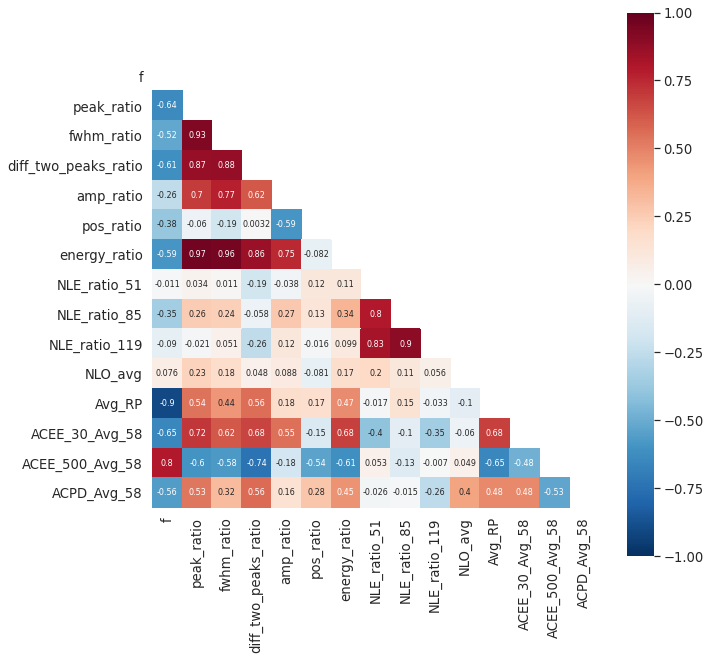

In [7]:
plot_corr(data_f, figsize=(10,10))

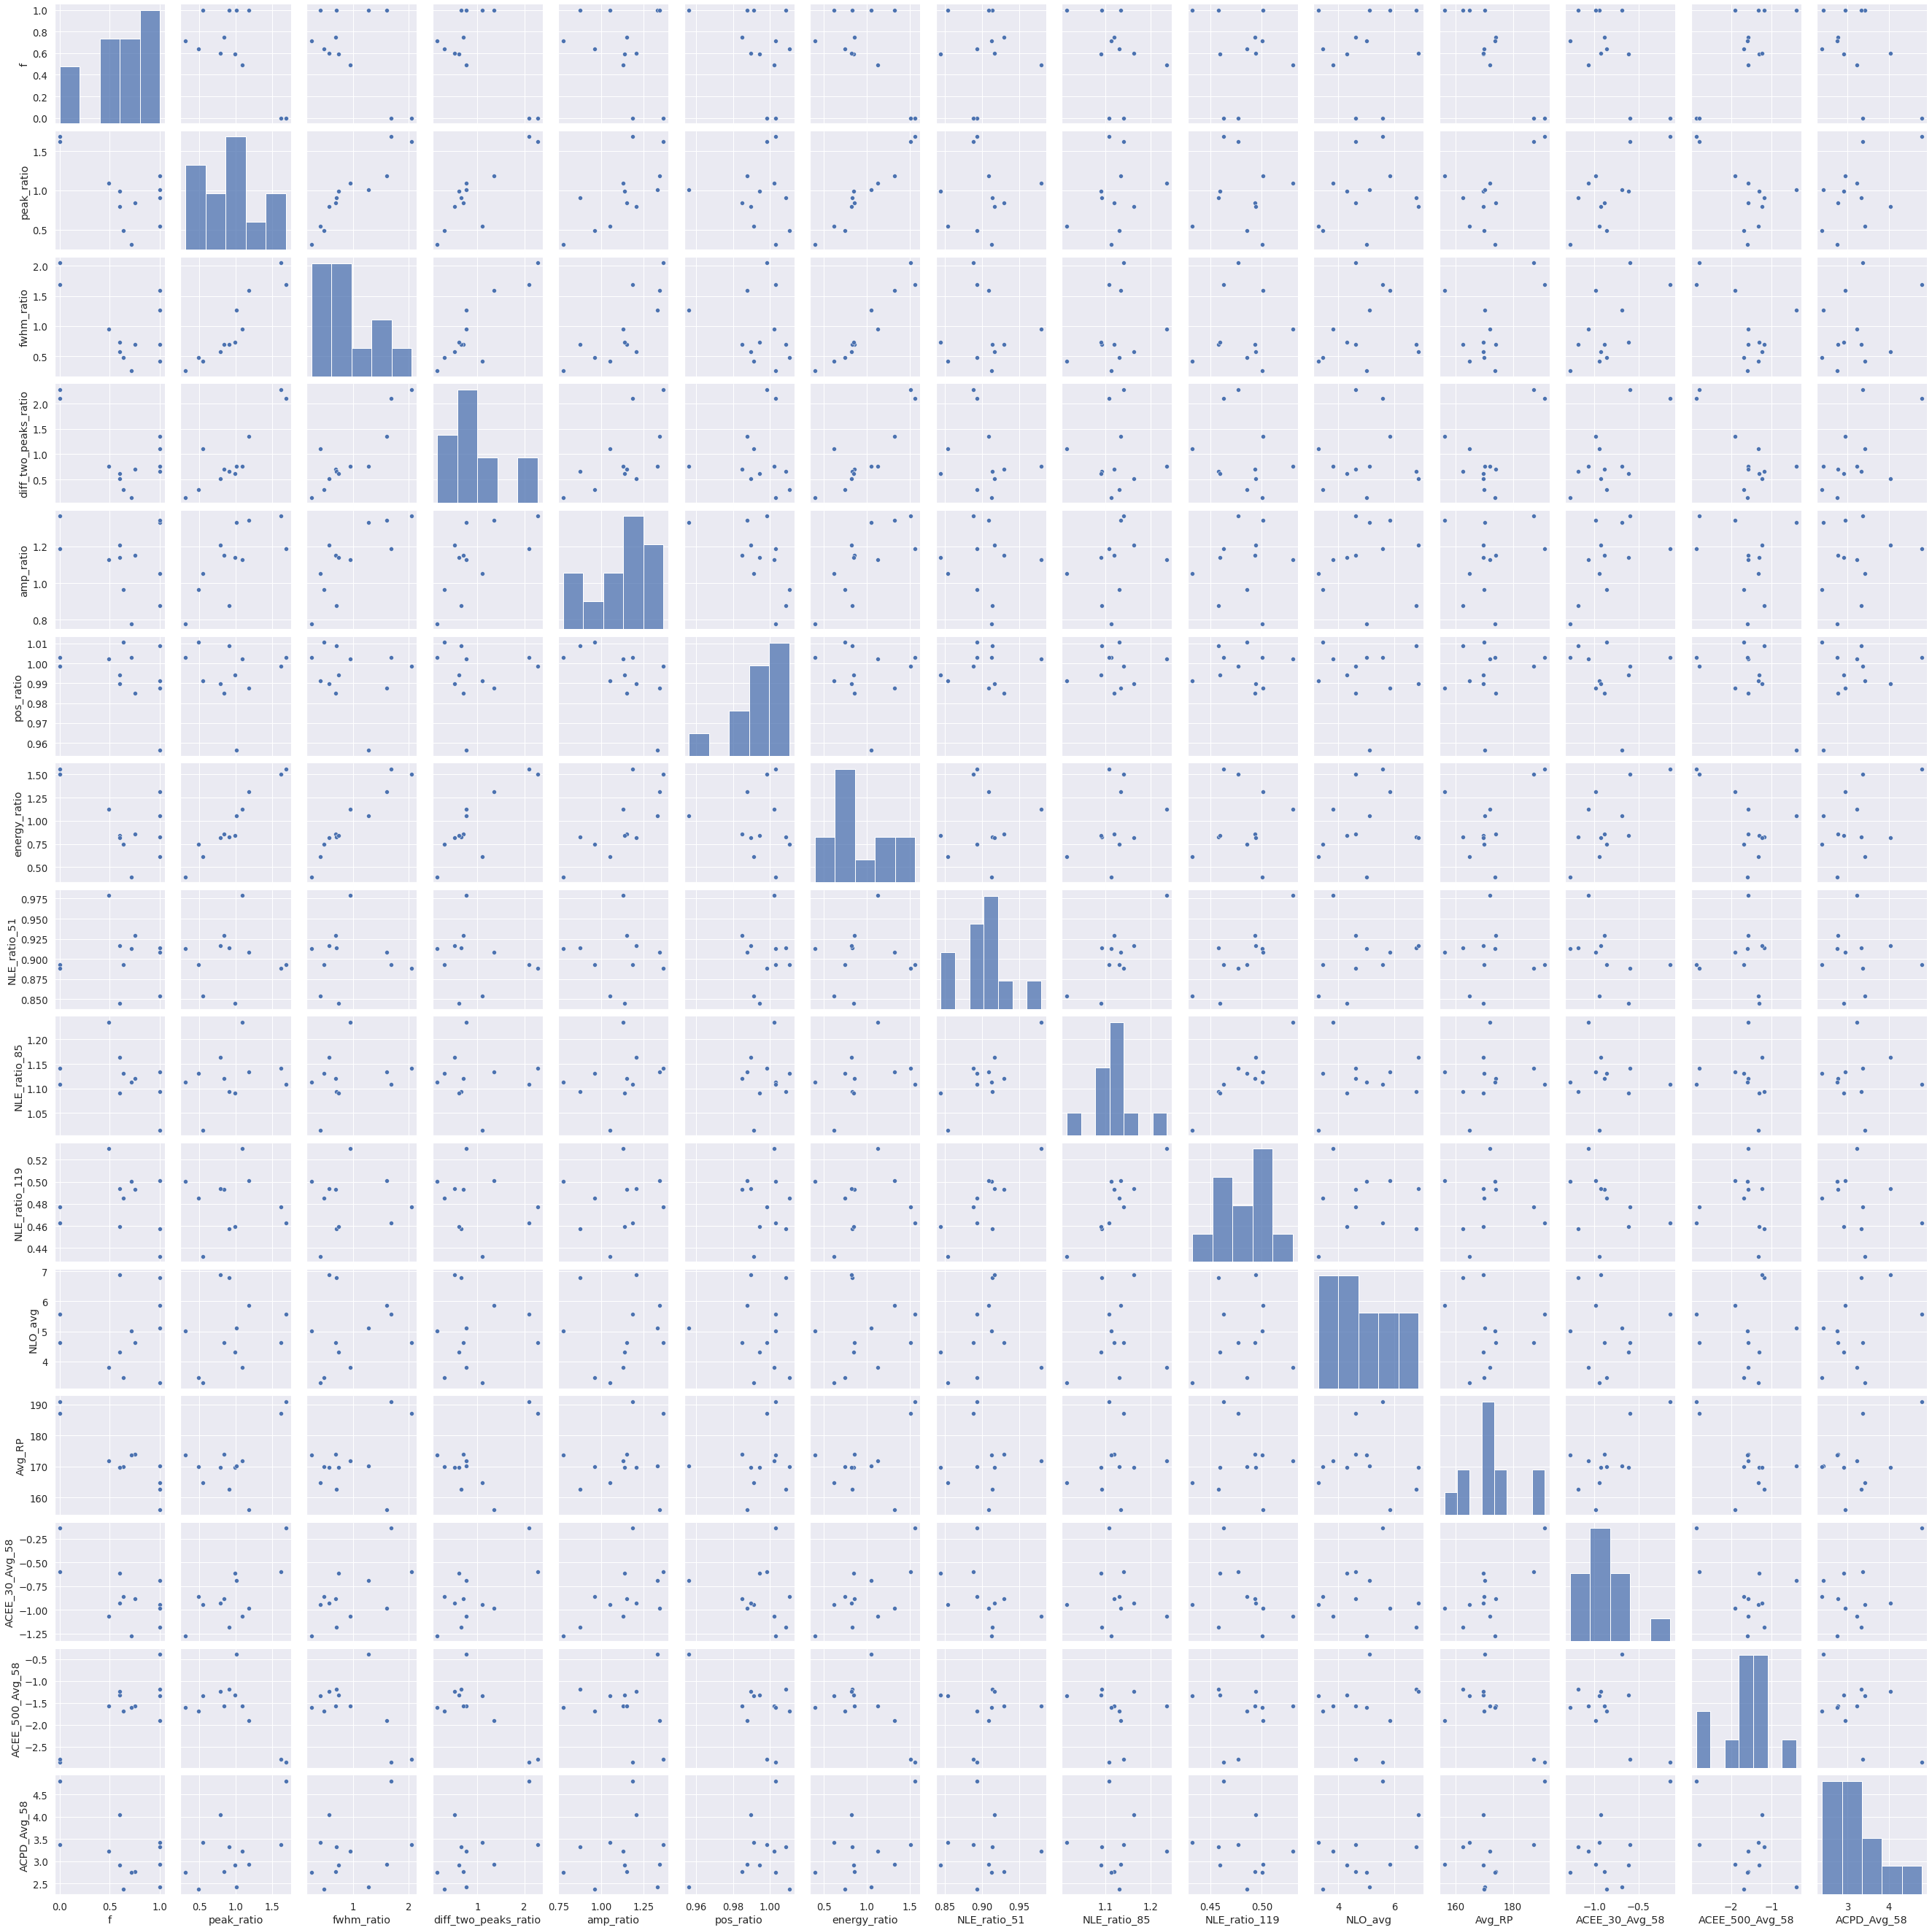

In [6]:
sns.pairplot(data_f)

In [10]:
test = pd.melt(data_f, 
               id_vars=['f'])

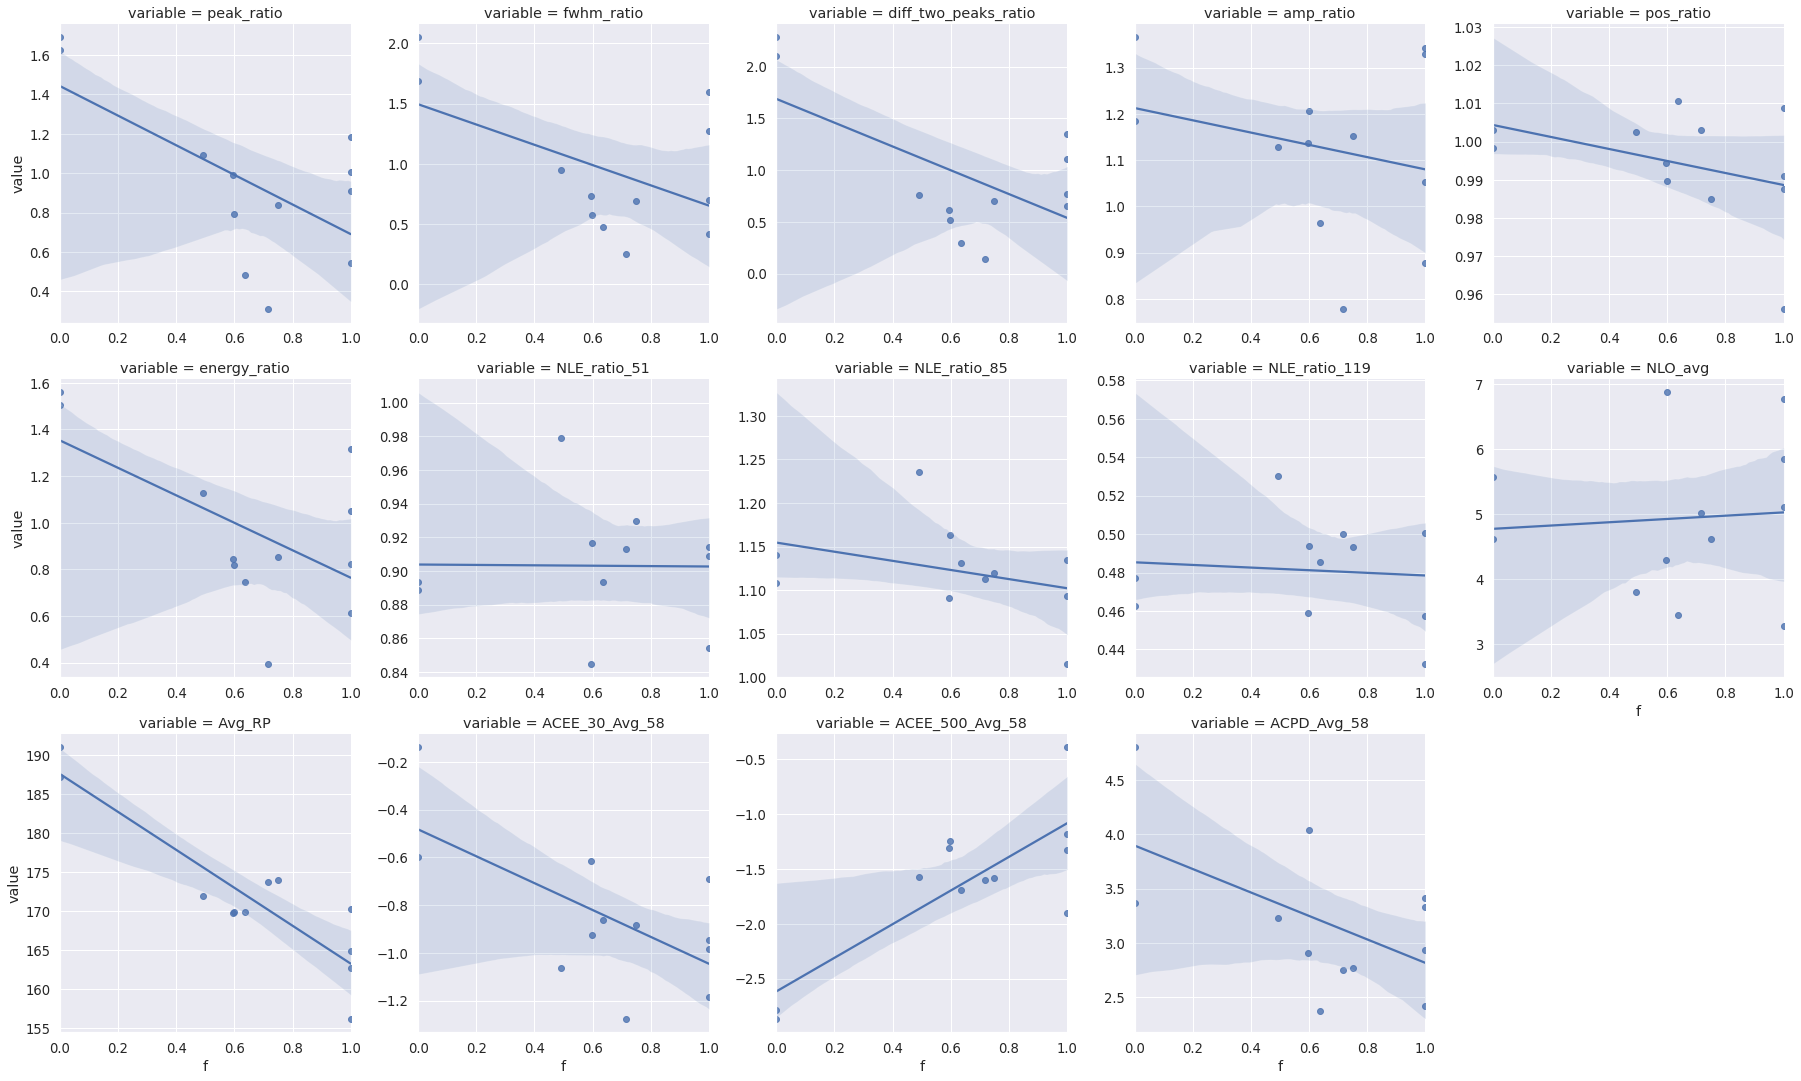

In [12]:
sns.lmplot(x='f', y='value', data=test, 
           col='variable', col_wrap=5,
           sharey=False, sharex=False)

### Use only selected columns

In [ ]:
short_f = data_f.loc[:, [list_col]]

In [ ]:
plot_corr(short_f, figsize=(5,6))

In [ ]:
sns.pairplot(short_f)

In [22]:
test = pd.melt(short_f, 
               id_vars=['f'], value_vars=[] )

In [ ]:
sns.lmplot(x='f', y='value', data=test, 
           col='Type', row='variable', sharey=False, sharex=False)